----- Figure 1 -----


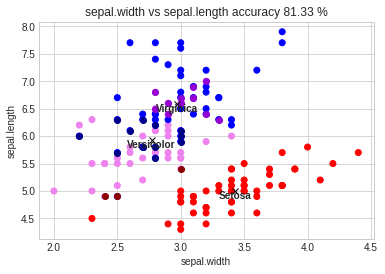

----- Figure 2 -----


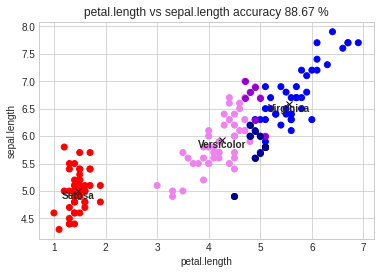

----- Figure 3 -----


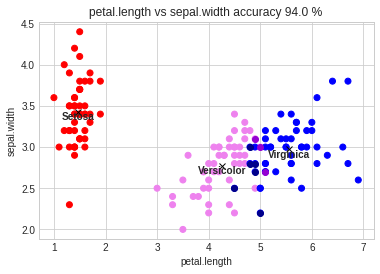

----- Figure 4 -----


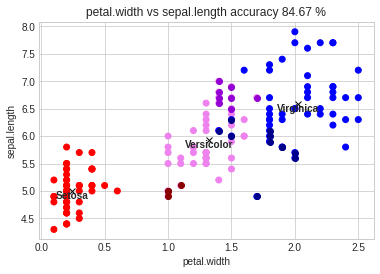

----- Figure 5 -----


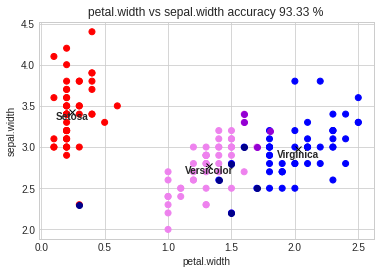

----- Figure 6 -----


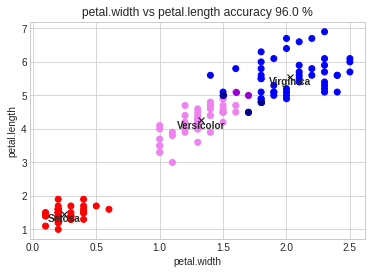

In [ ]:
#----------------------------------------
#  CSC 315 / 615 Spring 2023
#  Project 2 Flower Species Analysis
#
#  Nicey Raiyani
#----------------------------------------


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import math
import pandas as pd

df = pd.read_csv("iris.csv")


#----
# Define your functions here
#----
def average(column):
  return column.mean()

def flower_centroid(x_name, y_name, flower):
  x_Sent = df.loc[df['variety'] == flower, x_name]
  y_Sent = df.loc[df['variety'] == flower, y_name]
  plt.plot(average(x_Sent), average(y_Sent), c = 'black', marker = 'x')
  plt.annotate(flower, xy=(average(x_Sent), average(y_Sent)), ha = 'center', va = 'top' ,
               fontweight='bold')
  return average(x_Sent), average(y_Sent)

def plotting(x_name, y_name):
  color_map = {'Setosa' : 'red', 'Versicolor' : 'violet', 'Virginica' : 'blue'}
  color_column = df['variety']
  colors = color_column.map(color_map)
  x = df[x_name]
  y = df[y_name]

  plt.scatter(x,  y , c = colors)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.title(x_name + ' vs ' + y_name)

  correct = 0
  # Adding all the centroids
  flower = 'Setosa'
  setCX , setCY = flower_centroid(x_name, y_name, flower)

  flower = 'Virginica'
  virgCX, virgCY = flower_centroid(x_name, y_name, flower)

  flower = 'Versicolor'
  versCX, versCY = flower_centroid(x_name, y_name, flower)

  for i in range(150):
    x_value = df.loc[i, x_name]
    y_value = df.loc[i, y_name]
    dist_set = math.sqrt(pow(x_value - setCX, 2) + pow(y_value - setCY, 2))
    dist_virg = math.sqrt(pow(x_value - virgCX, 2) + pow(y_value - virgCY, 2))
    dist_vers = math.sqrt(pow(x_value - versCX, 2) + pow(y_value - versCY, 2))
    predictedflower = min(dist_set, dist_virg, dist_vers)
    #print(str(dist_set) + " " + str(dist_virg) + " " + str(dist_vers) + " == " + str(predictedflower))
    if(round(predictedflower, 5) == round(dist_set, 5)):
      predictedflower = 'Setosa'
      newcolor = 'darkred'
    elif(round(predictedflower, 5) == round(dist_virg, 5)):
      predictedflower = 'Virginica'
      newcolor = 'darkviolet'
    elif(round(predictedflower, 5) == round(dist_vers, 5)):
      predictedflower = 'Versicolor'
      newcolor = 'darkblue'

    #print(str(predictedflower) + "    " + df.loc[i, 'variety'])
    if(str(predictedflower) == df.loc[i, 'variety']) :
      correct = correct + 1
    else:
      plt.scatter(x_value, y_value, color = newcolor)
      
  accuracy = 100 * (correct / 150)
  plt.title(x_name + ' vs ' + y_name + ' accuracy ' + str(round(accuracy,2)) + ' %')
  return plt

#----
# Read the Iris data
#----
df = pd.read_csv("iris.csv")

#----
# Run your main code here
#----

# PLOT 1
x_name = 'sepal.width'
y_name = 'sepal.length'
plot1 = plotting(x_name, y_name)
print('----- Figure 1 -----')
plot1.show()

# PLOT 2
x_name = 'petal.length'
y_name = 'sepal.length'
plot2 = plotting(x_name, y_name)
print('----- Figure 2 -----')
plot2.show()

# PLOT 3
x_name = 'petal.length'
y_name = 'sepal.width'
plot3 = plotting(x_name, y_name)
print('----- Figure 3 -----')
plot3.show()

# PLOT 4
x_name = 'petal.width'
y_name = 'sepal.length'
plot4 = plotting(x_name, y_name)
print('----- Figure 4 -----')
plot4.show()

# PLOT 5
x_name = 'petal.width'
y_name = 'sepal.width'
plot5 = plotting(x_name, y_name)
print('----- Figure 5 -----')
plot5.show()

# PLOT 6
x_name = 'petal.width'
y_name = 'petal.length'
plot6 = plotting(x_name, y_name)
print('----- Figure 6 -----')
plot6.show()
